# Resultados

## Modelo de clasificación Binaria 

Found 1732 images belonging to 2 classes.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step
              precision    recall  f1-score   support

     Clase 0       0.95      0.93      0.94      1017
     Clase 1       0.90      0.93      0.92       715

    accuracy                           0.93      1732
   macro avg       0.93      0.93      0.93      1732
weighted avg       0.93      0.93      0.93      1732



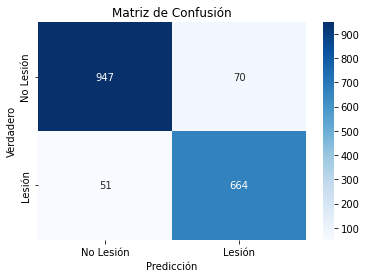

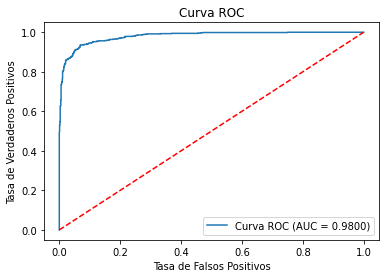

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el modelo guardado sin compilar
modelo_2clases = load_model('modelosFinales/xception_clasificacion2clases.keras', compile=False)

# Configura el generador de imágenes para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'imgs/crops_2classes/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Asegúrate de que el class_mode sea el correcto según tu modelo
    shuffle=False
)

# Predecir las probabilidades en el conjunto de prueba
y_pred_proba = modelo_2clases.predict(test_generator)

# Convertir probabilidades a etiquetas binarias
y_pred = (y_pred_proba > 0.8).astype(int)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Calcular las métricas de evaluación
print(classification_report(y_true, y_pred, target_names=['Clase 0', 'Clase 1']))

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Lesión', 'Lesión'], yticklabels=['No Lesión', 'Lesión'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

# Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
roc_auc = roc_auc_score(y_true, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular Accuracy, Precision, Recall y F1-Score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93


In [6]:
# Extraer los valores de la matriz de confusión
TN, FP, FN, TP = cm.ravel()

# Calcular el False Negative Rate (FNR)
fnr = FN / (FN + TP) if (FN + TP) > 0 else 0

print(f'False Negative Rate (FNR) para Clase 1: {fnr:.4f} or {fnr*100:.2f}%')

False Negative Rate (FNR) para Clase 1: 0.0713 or 7.13%


## Modelo de clasificación 3 clases 

Found 1732 images belonging to 3 classes.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 3775s 70s/step
Reporte de Clasificación:
              precision    recall  f1-score   support

    Negative       0.92      0.92      0.92      1017
  high_grade       0.88      0.91      0.89       420
   low_grade       0.75      0.69      0.72       295

    accuracy                           0.88      1732
   macro avg       0.85      0.84      0.84      1732
weighted avg       0.88      0.88      0.88      1732



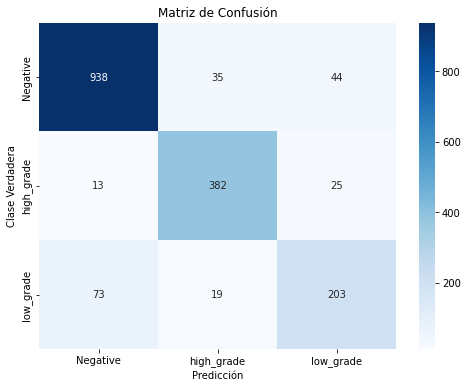

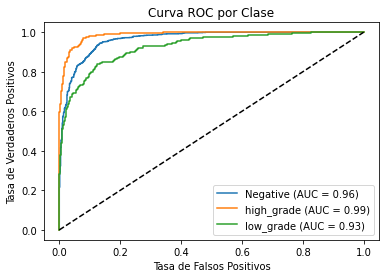

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el modelo guardado sin compilar
modelo_3clases = load_model('modelosFinales/xception_clasificacion3clases.keras', compile=False)

# Configura el generador de imágenes para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'imgs/crops_3classes/test', 
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  
    shuffle=False
)

# Predecir las probabilidades en el conjunto de prueba
y_pred_proba = modelo_3clases.predict(test_generator)

# Convertir probabilidades a etiquetas categóricas
y_pred = np.argmax(y_pred_proba, axis=1)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Obtener las clases
class_labels = list(test_generator.class_indices.keys())

# Verificar que las dimensiones coincidan entre las etiquetas verdaderas y las predicciones
y_true_corrected = y_true[:len(y_pred)]

# Calcular las métricas de evaluación
print("Reporte de Clasificación:")
print(classification_report(y_true_corrected, y_pred, target_names=class_labels))

# Crear la matriz de confusión
cm = confusion_matrix(y_true_corrected, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Clase Verdadera')
plt.show()

# Calcular la curva ROC y el AUC para cada clase
fpr, tpr, roc_auc = {}, {}, {}
for i, class_name in enumerate(class_labels):
    fpr[class_name], tpr[class_name], _ = roc_curve(y_true_corrected == i, y_pred_proba[:, i])
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])
    plt.plot(fpr[class_name], tpr[class_name], label=f'{class_name} (AUC = {roc_auc[class_name]:.2f})')

# Graficar la curva ROC por clase
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc='lower right')
plt.show()

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Check if labels are one-hot encoded and convert if necessary
if test_generator.class_mode == 'categorical':
    if test_generator.labels.ndim == 2:
        y_true = np.argmax(test_generator.labels, axis=1)
    else:
        print("Labels are not in one-hot encoded format.")

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Calcular el AUC Micro
y_true_binary = tf.keras.utils.to_categorical(y_true_corrected, num_classes=len(class_labels))
fpr_micro, tpr_micro, _ = roc_curve(y_true_binary.ravel(), y_pred_proba.ravel())
auc_micro = auc(fpr_micro, tpr_micro)

# Imprimir métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc_micro:.2f}")

Labels are not in one-hot encoded format.
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1-Score: 0.88
AUC: 0.97


In [9]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Calcular FPR, TPR y AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}
support = {}

for i, class_name in enumerate(class_labels):
    fpr[class_name], tpr[class_name], _ = roc_curve(y_true_binary[:, i], y_pred_proba[:, i])
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])
    support[class_name] = np.sum(y_true_binary[:, i])  # Número de muestras reales de la clase

# Calcular AUC Macro
auc_macro = np.mean(list(roc_auc.values()))

# Calcular AUC Weighted
total_support = np.sum(list(support.values()))
auc_weighted = sum(roc_auc[class_name] * support[class_name] for class_name in class_labels) / total_support

print(f"AUC Macro: {auc_macro:.2f}")
print(f"AUC Weighted: {auc_weighted:.2f}")

AUC Macro: 0.96
AUC Weighted: 0.96


## Modelo de clasificación 5 clases 

Found 715 images belonging to 5 classes.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 1666s 76s/step
              precision    recall  f1-score   support

       ASC-H       0.84      0.86      0.85       139
      ASC-US       0.71      0.62      0.66        91
        HSIL       0.89      0.91      0.90       256
        LSIL       0.81      0.83      0.82       204
         SCC       0.73      0.64      0.68        25

    accuracy                           0.83       715
   macro avg       0.79      0.77      0.78       715
weighted avg       0.83      0.83      0.83       715



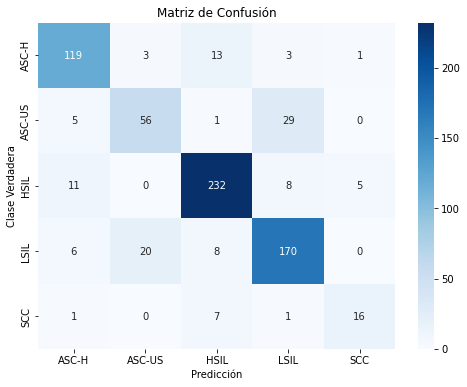

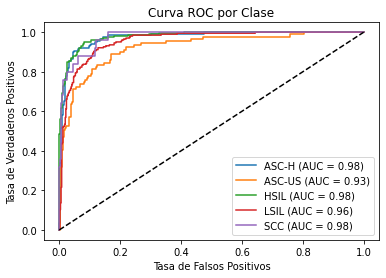

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score, precision_score, recall_score, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el modelo guardado sin compilar
modelo_5clases = load_model('modelosFinales/xception_clasificacion5clases.keras', compile=False)

# Configura el generador de imágenes para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'imgs/crops_5classes/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical', 
    shuffle=False
)

# Predecir las probabilidades en el conjunto de prueba
y_pred_proba = modelo_5clases.predict(test_generator)

# Convertir probabilidades a etiquetas categóricas
y_pred = np.argmax(y_pred_proba, axis=1)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Obtener las clases
class_labels = list(test_generator.class_indices.keys())

# Corregir las etiquetas verdaderas para alinear con y_pred
y_true_corrected = np.array([y for _, y in sorted(zip(test_generator.filenames, y_true))])

# Calcular las métricas de evaluación
print(classification_report(y_true_corrected, y_pred, target_names=class_labels))

# Crear la matriz de confusión
cm = confusion_matrix(y_true_corrected, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Clase Verdadera')
plt.show()

# Calcular la curva ROC y el AUC para cada clase con el mejor threshold
fpr, tpr, roc_auc = {}, {}, {}
for i, class_name in enumerate(class_labels):
    fpr[class_name], tpr[class_name], _ = roc_curve(y_true_corrected == i, y_pred_proba[:, i])
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])
    plt.plot(fpr[class_name], tpr[class_name], label=f'{class_name} (AUC = {roc_auc[class_name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Check if labels are one-hot encoded and convert if necessary
if test_generator.class_mode == 'categorical':
    if test_generator.labels.ndim == 2:
        y_true = np.argmax(test_generator.labels, axis=1)
    else:
        print("Labels are not in one-hot encoded format.")

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Calcular AUC Micro
y_true_binary = tf.keras.utils.to_categorical(y_true, num_classes=len(test_generator.class_indices))
fpr_micro, tpr_micro, _ = roc_curve(y_true_binary.ravel(), y_pred_proba.ravel())
auc_micro = auc(fpr_micro, tpr_micro)

# Imprimir métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc_micro:.2f}")

Labels are not in one-hot encoded format.
Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1-Score: 0.83
AUC: 0.97


In [3]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Calcular FPR, TPR y AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}
support = {}

for i, class_name in enumerate(class_labels):
    fpr[class_name], tpr[class_name], _ = roc_curve(y_true_binary[:, i], y_pred_proba[:, i])
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])
    support[class_name] = np.sum(y_true_binary[:, i])  # Número de muestras reales de la clase

# Calcular AUC Macro
auc_macro = np.mean(list(roc_auc.values()))

# Calcular AUC Weighted
total_support = np.sum(list(support.values()))
auc_weighted = sum(roc_auc[class_name] * support[class_name] for class_name in class_labels) / total_support

print(f"AUC Macro: {auc_macro:.2f}")
print(f"AUC Weighted: {auc_weighted:.2f}")

AUC Macro: 0.96
AUC Weighted: 0.97


## Modelo de clasificación 6 clases

Found 1732 images belonging to 6 classes.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step
              precision    recall  f1-score   support

       ASC-H       0.68      0.81      0.74       139
      ASC-US       0.50      0.41      0.45        91
        HSIL       0.82      0.85      0.83       256
        LSIL       0.62      0.71      0.66       204
         SCC       0.51      0.72      0.60        25
    Negative       0.95      0.89      0.92      1017

    accuracy                           0.83      1732
   macro avg       0.68      0.73      0.70      1732
weighted avg       0.84      0.83      0.83      1732



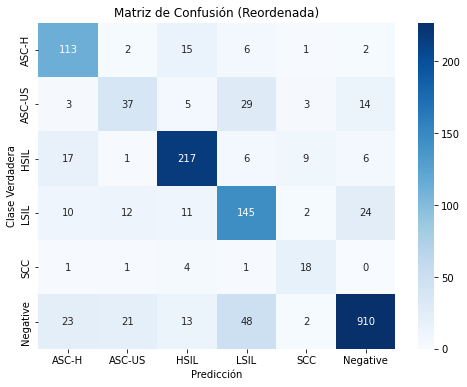

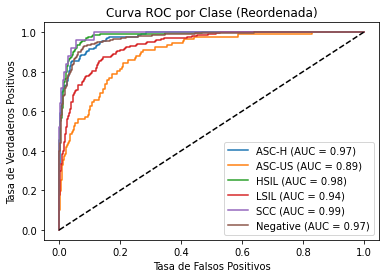

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score, precision_score, recall_score, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el modelo guardado sin compilar
modelo_6clases = load_model('modelosFinales/xception_clasificacion6clases.keras', compile=False)

# Configura el generador de imágenes para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'imgs/crops_6classes/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical', 
    shuffle=False
)

# Predecir las probabilidades en el conjunto de prueba
y_pred_proba = modelo_6clases.predict(test_generator)

# Convertir probabilidades a etiquetas categóricas
y_pred = np.argmax(y_pred_proba, axis=1)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Obtener las clases
class_labels = list(test_generator.class_indices.keys())

# Orden deseado
desired_order = ['ASC-H', 'ASC-US', 'HSIL', 'LSIL', 'SCC', 'Negative']

# Reordenar las etiquetas verdaderas y predichas según el orden deseado
class_indices = {label: idx for idx, label in enumerate(class_labels)}
reorder_indices = [class_indices[label] for label in desired_order]

# Reordenar la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
cm_reordered = cm[np.ix_(reorder_indices, reorder_indices)]

# Calcular el informe de clasificación con el nuevo orden
y_true_corrected = np.array([desired_order.index(class_labels[y]) for y in y_true])
y_pred_corrected = np.array([desired_order.index(class_labels[y]) for y in y_pred])

print(classification_report(y_true_corrected, y_pred_corrected, target_names=desired_order))

# Crear la matriz de confusión con el nuevo orden
plt.figure(figsize=(8, 6))
sns.heatmap(cm_reordered, annot=True, fmt="d", cmap='Blues', xticklabels=desired_order, yticklabels=desired_order, vmax=np.max(cm) // 4)
plt.title('Matriz de Confusión (Reordenada)')
plt.xlabel('Predicción')
plt.ylabel('Clase Verdadera')
plt.show()

# Calcular la curva ROC y el AUC para cada clase con el nuevo orden
fpr, tpr, roc_auc = {}, {}, {}
for i, class_name in enumerate(desired_order):
    fpr[class_name], tpr[class_name], _ = roc_curve(y_true_corrected == i, y_pred_proba[:, reorder_indices[i]])
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])
    plt.plot(fpr[class_name], tpr[class_name], label=f'{class_name} (AUC = {roc_auc[class_name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase (Reordenada)')
plt.legend(loc='lower right')
plt.show()

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Check if labels are one-hot encoded and convert if necessary
if test_generator.class_mode == 'categorical':
    if test_generator.labels.ndim == 2:
        y_true = np.argmax(test_generator.labels, axis=1)
    else:
        print("Labels are not in one-hot encoded format.")

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Calcular AUC Micro
y_true_binary = tf.keras.utils.to_categorical(y_true, num_classes=len(test_generator.class_indices))
fpr_micro, tpr_micro, _ = roc_curve(y_true_binary.ravel(), y_pred_proba.ravel())
auc_micro = auc(fpr_micro, tpr_micro)

# Imprimir métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc_micro:.2f}")

Labels are not in one-hot encoded format.
Accuracy: 0.83
Precision: 0.84
Recall: 0.83
F1-Score: 0.83
AUC: 0.98


In [10]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Calcular FPR, TPR y AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}
support = {}

for i, class_name in enumerate(class_labels):
    fpr[class_name], tpr[class_name], _ = roc_curve(y_true_binary[:, i], y_pred_proba[:, i])
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])
    support[class_name] = np.sum(y_true_binary[:, i])  # Número de muestras reales de la clase

# Calcular AUC Macro
auc_macro = np.mean(list(roc_auc.values()))

# Calcular AUC Weighted
total_support = np.sum(list(support.values()))
auc_weighted = sum(roc_auc[class_name] * support[class_name] for class_name in class_labels) / total_support

print(f"AUC Macro: {auc_macro:.2f}")
print(f"AUC Weighted: {auc_weighted:.2f}")

AUC Macro: 0.96
AUC Weighted: 0.97


In [ ]:
import numpy as np

# Dado que proporcionaste las etiquetas de las clases, definimos su orden aquí
class_labels = ['ASC-H', 'ASC-US', 'HSIL', 'LSIL', 'Negative', 'SCC']

# Index de la clase 'Negative' en la lista de etiquetas de clase
index_negative = class_labels.index('Negative') 

# Sumar todos los falsos negativos para las clases de lesiones
# Esto implica sumar todas las predicciones incorrectas en la columna de 'Negative' para las filas de las lesiones
false_negatives = np.sum(cm[:, index_negative]) - cm[index_negative, index_negative]

# Sumar todos los verdaderos casos de lesiones (sumar todas las filas para lesiones excepto la fila 'Negative')
true_cases = np.sum(cm) - np.sum(cm[index_negative, :]) - np.sum(cm[:, index_negative]) + cm[index_negative, index_negative]

# Calcular la tasa de falsos negativos
fnr = false_negatives / true_cases
print(f"False Negative Rate (FNR): {fnr:.4f} or {fnr*100:.2f}%")

False Negative Rate (FNR): 0.0688 or 6.88%


In [12]:
import numpy as np

# Suponiendo que cm es la matriz de confusión ya calculada y que class_labels son las etiquetas de tus clases
class_labels = ['ASC-H', 'ASC-US', 'HSIL', 'LSIL', 'Negative', 'SCC']

# Calcular FNR para cada clase
fnr_dict = {}
for idx, class_name in enumerate(class_labels):
    FN = cm[idx, :].sum() - cm[idx, idx]  # Falsos negativos son todos los casos mal clasificados para la clase actual
    TP = cm[idx, idx]  # Verdaderos positivos son los casos correctamente clasificados como la clase actual
    if (FN + TP) > 0:
        fnr = FN / (FN + TP)
    else:
        fnr = np.nan  # Si no hay casos verdaderos positivos ni falsos negativos, el FNR no se puede calcular
    fnr_dict[class_name] = fnr

# Imprimir los resultados
for class_name, fnr in fnr_dict.items():
    print(f"False Negative Rate for {class_name}: {fnr:.4f} or {fnr*100:.2f}%")

False Negative Rate for ASC-H: 0.1871 or 18.71%
False Negative Rate for ASC-US: 0.5934 or 59.34%
False Negative Rate for HSIL: 0.1523 or 15.23%
False Negative Rate for LSIL: 0.2892 or 28.92%
False Negative Rate for Negative: 0.1052 or 10.52%
False Negative Rate for SCC: 0.2800 or 28.00%


## Clasificación Binario -> Clasificación 5 Clases

Found 1732 images belonging to 2 classes.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━

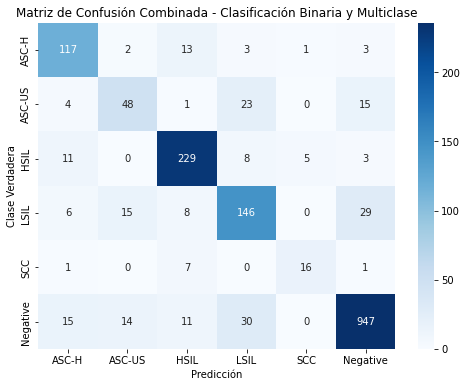

In [95]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Cargar modelos
binary_model = tf.keras.models.load_model('modelosFinales/xception_clasificacion2clases.keras', compile=False)
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

five_classes_model = tf.keras.models.load_model('modelosFinales/xception_clasificacion5clases.keras', compile=False)
five_classes_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                           loss='categorical_crossentropy',
                           metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Directorio de prueba
test_dir = 'imgs/crops/test'

# Configuración del generador de imágenes para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Evaluar y clasificar usando el modelo binario
binary_probabilities = binary_model.predict(test_generator)  # Salidas de softmax
binary_predictions = (binary_probabilities > 0.8).astype(int)  # Umbralizar para clasificación binaria
y_true_binary = test_generator.classes

# Crear DataFrame para almacenar predicciones, probabilidades y rutas de archivos
binary_results_df = pd.DataFrame({
    'filepath': test_generator.filepaths,
    'true_label': y_true_binary,
    'predicted_label': binary_predictions.flatten(),
    'negative_prob': 1 - binary_probabilities.flatten(),  # Probabilidad de "No Lesión"
    'lesion_prob': binary_probabilities.flatten()  # Probabilidad de "Lesión"
})

# Clases conocidas
lesion_classes = ['ASC-H', 'ASC-US', 'HSIL', 'LSIL', 'SCC', 'Negative']
num_classes = len(lesion_classes)

# Dividir en dos grupos: imágenes clasificadas como "Lesión" y "No Lesión"
lesion_indices = np.where(binary_predictions == 1)[0]
no_lesion_indices = np.where(binary_predictions == 0)[0]

# Preparar listas para las etiquetas verdaderas, predichas y probabilidades
y_true_combined = []
y_pred_combined = []
y_pred_combined_proba = []

# Paso 1: Clasificar imágenes de "Lesión" con el modelo de 5 clases
for i in lesion_indices:
    img_path = test_generator.filepaths[i]
    true_class_name = os.path.basename(os.path.dirname(img_path))  # Obtener clase verdadera desde el path
    true_class_index = lesion_classes.index(true_class_name)  # Índice de la clase verdadera

    # Procesar la imagen para el modelo multiclase
    img_multi = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array_multi = tf.keras.preprocessing.image.img_to_array(img_multi)
    img_array_multi = np.expand_dims(img_array_multi, axis=0) / 255.0

    # Realizar la predicción con el modelo de 5 clases
    multi_class_pred = five_classes_model.predict(img_array_multi)[0]  # Obtener las probabilidades

    # Agregar la probabilidad de "Negative" del modelo binario para normalizar
    negative_prob = binary_results_df.loc[i, 'negative_prob']
    multi_class_pred = list(multi_class_pred) + [negative_prob]

    # Normalizar probabilidades
    prob = [p / sum(multi_class_pred) for p in multi_class_pred]

    # Agregar a las listas combinadas
    y_true_combined.append(true_class_index)
    y_pred_combined.append(np.argmax(prob))
    y_pred_combined_proba.append(prob)

# Paso 2: Ajustar probabilidades para imágenes clasificadas como "Negative"
for i in no_lesion_indices:
    img_path = test_generator.filepaths[i]
    true_class_name = os.path.basename(os.path.dirname(img_path))
    
    # Probabilidad de "Negative" del modelo binario
    negative_prob = binary_results_df.loc[i, 'negative_prob']
    
    # Asignar una probabilidad baja uniforme para las clases de lesiones
    lesion_prob = (1 - negative_prob) / (num_classes - 1)
    prob = [lesion_prob] * (num_classes - 1) + [negative_prob]

    # Asegurar normalización
    prob = [p / sum(prob) for p in prob]

    if true_class_name == "Negative":
        y_true_combined.append(lesion_classes.index("Negative"))
        y_pred_combined.append(lesion_classes.index("Negative"))
    else:
        true_class_index = lesion_classes.index(true_class_name)
        y_true_combined.append(true_class_index)
        y_pred_combined.append(lesion_classes.index("Negative"))

    y_pred_combined_proba.append(prob)

# Convertir y_pred_combined_proba a numpy array
y_pred_combined_proba = np.array(y_pred_combined_proba)

# Crear y visualizar la matriz de confusión combinada
cm_combined = confusion_matrix(y_true_combined, y_pred_combined)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=lesion_classes, yticklabels=lesion_classes, vmax=np.max(cm_combined) // 4)
plt.xlabel('Predicción')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión Combinada - Clasificación Binaria y Multiclase')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import pandas as pd
import tensorflow as tf

# Definir lesion_classes y número de clases
lesion_classes = ['ASC-H', 'ASC-US', 'HSIL', 'LSIL', 'SCC', 'Negative']
num_classes = len(lesion_classes)

# Convertir y_true_combined a one-hot encoding
y_true_combined_one_hot = tf.keras.utils.to_categorical(y_true_combined, num_classes)

# Inicializar estructuras para almacenar fpr, tpr, y auc
fpr = {}
tpr = {}
roc_auc = {}

# Calcular FPR, TPR y AUC para cada clase
for i in range(num_classes):
    try:
        fpr[i], tpr[i], _ = roc_curve(y_true_combined_one_hot[:, i], y_pred_combined_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    except Exception as e:
        roc_auc[i] = np.nan  # Usar NaN donde AUC no pueda calcularse

# Calcular el AUC promedio
average_roc_auc = np.nanmean(list(roc_auc.values()))

# Generar el informe de clasificación con sklearn
from sklearn.metrics import classification_report

report = classification_report(y_true_combined, np.argmax(y_pred_combined_proba, axis=1), target_names=lesion_classes, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Formatear columnas numéricas
report_df = report_df.copy()
report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']].applymap(lambda x: f"{x:.2f}")
report_df['support'] = report_df['support'].astype(int)  # Asegurar que 'support' no tenga decimales

# Agregar las métricas de ROC-AUC al informe
report_df['roc_auc'] = [roc_auc.get(i, 'N/A') for i in range(num_classes)] + [np.nan] * 3  # Agregar NaN para las filas finales
report_df.at['macro avg', 'roc_auc'] = average_roc_auc
report_df.at['weighted avg', 'roc_auc'] = average_roc_auc
report_df['roc_auc'] = report_df['roc_auc'].map(lambda x: f"{x:.2f}" if not pd.isna(x) else "N/A")

# Mostrar el informe en formato Markdown
print(report_df.to_markdown())


|              |   precision |   recall |   f1-score |   support | roc_auc   |
|:-------------|------------:|---------:|-----------:|----------:|:----------|
| ASC-H        |        0.76 |     0.84 |       0.8  |       139 | 0.98      |
| ASC-US       |        0.61 |     0.53 |       0.56 |        91 | 0.91      |
| HSIL         |        0.85 |     0.89 |       0.87 |       256 | 0.98      |
| LSIL         |        0.7  |     0.72 |       0.71 |       204 | 0.95      |
| SCC          |        0.73 |     0.64 |       0.68 |        25 | 0.95      |
| Negative     |        0.95 |     0.93 |       0.94 |      1017 | 0.98      |
| accuracy     |        0.87 |     0.87 |       0.87 |         0 | N/A       |
| macro avg    |        0.77 |     0.76 |       0.76 |      1732 | 0.96      |
| weighted avg |        0.87 |     0.87 |       0.87 |      1732 | 0.96      |


In [102]:
# Crear estructuras para almacenar fpr, tpr y AUC por clase
fpr = {}
tpr = {}
roc_auc = {}

# Calcular FPR, TPR y AUC por clase
for i in range(num_classes):
    try:
        fpr[i], tpr[i], _ = roc_curve(y_true_combined_one_hot[:, i], y_pred_combined_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    except Exception as e:
        roc_auc[i] = np.nan  # Si no se puede calcular el AUC para alguna clase

# Calcular Micro-AUC
fpr_micro, tpr_micro, _ = roc_curve(y_true_combined_one_hot.ravel(), y_pred_combined_proba.ravel())
micro_auc = auc(fpr_micro, tpr_micro)

# Calcular Macro-AUC: promedio simple de los AUC por clase
macro_auc = np.nanmean(list(roc_auc.values()))

# Calcular Weighted-AUC: promedio ponderado de los AUC por clase
weights = np.sum(y_true_combined_one_hot, axis=0)  # Total de ejemplos por clase
weights = weights / np.sum(weights)  # Normalizar pesos
weighted_auc = np.nansum([roc_auc[i] * weights[i] for i in range(num_classes)])

# Imprimir resultados
print(f"Micro-AUC: {micro_auc:.2f}")
print(f"Macro-AUC: {macro_auc:.2f}")
print(f"Weighted-AUC: {weighted_auc:.2f}")

Micro-AUC: 0.98
Macro-AUC: 0.96
Weighted-AUC: 0.97


In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular FNR para cada clase
fnr = {}
for i, class_name in enumerate(lesion_classes):
    FN = cm_combined[i, :].sum() - cm_combined[i, i]
    TP = cm_combined[i, i]
    fnr[class_name] = FN / (FN + TP) if (FN + TP) > 0 else 0  # Prevenir división por cero

# Mostrar la tasa de falsos negativos para cada clase
print("Tasa de Falsos Negativos por clase:")
for class_name, rate in fnr.items():
    print(f"{class_name}: {rate:.4f} or {rate*100:.2f}%")

Tasa de Falsos Negativos por clase:
ASC-H: 0.1583 or 15.83%
ASC-US: 0.4725 or 47.25%
HSIL: 0.1055 or 10.55%
LSIL: 0.2843 or 28.43%
SCC: 0.3600 or 36.00%
Negative: 0.0688 or 6.88%


In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Asumiendo que ya tienes 'y_true_binary' que son las etiquetas verdaderas binarias y 'binary_predictions' que son las predicciones binarias

# Calcular la matriz de confusión
cm = confusion_matrix(y_true_binary, binary_predictions)

# Los falsos negativos están en la posición [1, 0] de la matriz de confusión
false_negatives = cm[1, 0]
true_positives = cm[1, 1]

# Calcular el False Negative Rate (FNR)
if (true_positives + false_negatives) > 0:
    fnr = false_negatives / (true_positives + false_negatives)
else:
    fnr = 0  # Evitar división por cero en caso de no haber positivos verdaderos

print(f"False Negative Rate (FNR): {fnr:.4f} o {fnr * 100:.2f}%")

False Negative Rate (FNR): 0.0713 o 7.13%


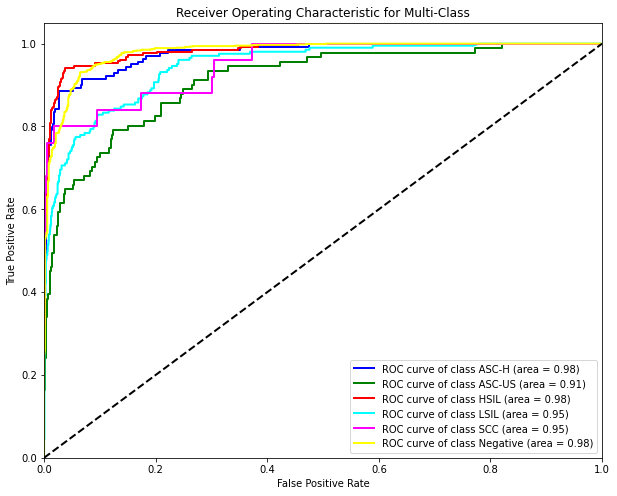

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from itertools import cycle

# Define lesion classes and their associated labels
lesion_classes = ['ASC-H', 'ASC-US', 'HSIL', 'LSIL', 'SCC', 'Negative']
num_classes = len(lesion_classes)

# Assuming `y_true_combined` are your true labels and `y_pred_combined_proba` are your model's predicted probabilities
y_true_combined_one_hot = tf.keras.utils.to_categorical(y_true_combined, num_classes)

# Generate ROC curve for each class
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'indigo', 'pink', 'lightblue'])
plt.figure(figsize=(10, 8))

for i, color in zip(range(num_classes), colors):
    fpr, tpr, _ = roc_curve(y_true_combined_one_hot[:, i], y_pred_combined_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(lesion_classes[i], roc_auc))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()